<a href="https://colab.research.google.com/github/danjohnvelasco/AI-Playground/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent (GD)

In this notebook, I'll implement gradient descent from "scratch". With quotes because it's not entirely from scratch because I'll use pytorch to calculate the gradients.

I'll also dig a little deeper into the code to see what's behind the pytorch functions that are used.

Most of this stuff comes from lesson 2 of fastai v3 course.



In [187]:
# Import dependencies
from fastai.basics import *

## Setup the problem

Problem: linear regression

Description: The goal of linear regression is to fit a line to a set of points. By fit, it means to find a set of `coefficients or parameters or weights` that'll give the line with least errors (distance from a point in a line to the actual data point) on a set of points.


Behind the functions:
- torch.ones : returns a tensor filled with 1's. The size of a tensor is defined by the arguments which expects a sequence of numbers. torch.ones(10, 2) will return a 2D tensor with 10 rows x 2 columns tensor, torch.ones(10,2,3) will return  a 3D tensor.

- torch.Tensor.uniform_ : fills tensor with numbers sampled from the continuous uniform distribution. (By default numbers range from 0 to 1)

- tensor : creates PyTorch tensors. You can pass sequence of elements or lists. tensor(3,2) -> tensor([3,2]), tensor([3,2],[4,5]) -> tensor (2D)

- torch.randn : returns a tensor filled with random numbers from a standard normal distribution (mean = 0, variance = 1).

*In PyTorch, function names with '_' means the function happens inplace.



In [188]:
# number of points
n=100

In [189]:
x = torch.ones(n,2) # type: torch.Tensor
x[:,0].uniform_(-1.,1) # apply uniform_ on 1st column
x[:5]

tensor([[-0.7315,  1.0000],
        [ 0.7302,  1.0000],
        [ 0.4163,  1.0000],
        [-0.9491,  1.0000],
        [-0.6203,  1.0000]])

## Model/Architecture: y = ax + b

`y = ax + b` can be represented in matrices.

let vector `z = [a,1]`; a be any real number

Do matrix multiplication then it becomes `y = a(x) + b(1) which is just y = ax + b`

I want to find the parameter ```a``` such that it minimizes the error between the points in a line and `x@a` datapoints.

For a regression problem, Mean Squared Error (MSE) is often used as a loss function.



In [190]:
# 3. means float
# a is the parameters we're learning
# The learned parameters should be close to this but we'll pretend that we 
# don't know the actual numbers
a = tensor(3.,2)
a

tensor([3., 2.])

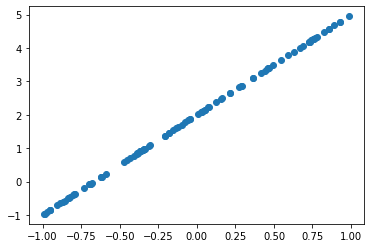

In [191]:
# See what our dataset looks like
y = x@a # matrix multiplication
plt.scatter(x[:,0], y);

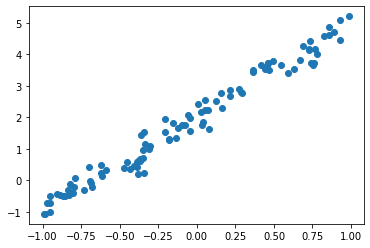

In [192]:
# Add noise
y = x@a + 0.25*torch.randn(n) # random numbers
plt.scatter(x[:,0], y);

In [193]:
# loss function
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [194]:
a = tensor(-1.,1)
y_hat = x@a

In [195]:
y_hat = x@a

In [196]:
# We're far
mse(y_hat,y)

tensor(5.8109)

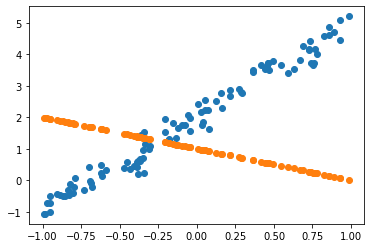

In [197]:
# Not surprisingly, the orange line looks like that because the slope is -1.
# This tells us that the parameter 'a' or the slop is not what we want.
# It'll be tedious to go bruteforce so we'll use gradient descent.
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

## Optimizing parameter 'a' or slope to find the best line that fits our dataset

---

**Optimizer**: Gradient Descent (GD)


**Description**: Given a loss function defined by a set of parameters, GD starts with an initial set of parameters and iteratively moves towards the set of parameters that minimizes the loss function. The iterative minimization is achieved by taking steps in the negative direction of the gradient/slope of the function.

[Click here for more info on loss.backward()](https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95)



In [198]:
# Convert regular tensor object to a kind of
# tensor that is considered as a module/model parameter
# which is required by PyTorch for it to compute gradients
a = nn.Parameter(tensor(-1.,1.)); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [199]:
def update(n):
    '''updates vector a'''
    losses = [] # tracks losses history
    for i in range(n):
        y_hat = x@a
        loss = mse(y_hat, y) # y_hat -> predictions, y -> actual value
        losses.append(loss)

        if i % 10 == 0: 
            print(loss) # just prints stuff, DOESN'T AFFECT THE ALGO
            
        loss.backward() # computes gradient of current tensor wrt to graph leaves (need to dig into this)

        with torch.no_grad():
            a.sub_(lr * a.grad) # subtracts learning rate * gradient to the parameters (inplace)
            a.grad.zero_() # reset grad to zero because torch accumulates grad.. you don't want to reuse it
    
    plt.plot(list(range(0,len(losses))), losses)

tensor(5.8109, grad_fn=<MeanBackward0>)
tensor(1.4620, grad_fn=<MeanBackward0>)
tensor(0.4333, grad_fn=<MeanBackward0>)
tensor(0.1705, grad_fn=<MeanBackward0>)
tensor(0.1031, grad_fn=<MeanBackward0>)
tensor(0.0859, grad_fn=<MeanBackward0>)
tensor(0.0814, grad_fn=<MeanBackward0>)
tensor(0.0803, grad_fn=<MeanBackward0>)
tensor(0.0800, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)


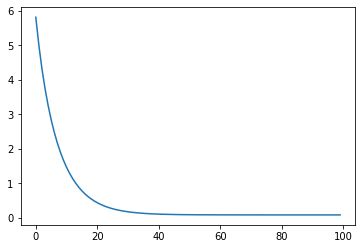

In [200]:
# Test run
lr = 1e-1
update(100)

In [201]:
# This are the learned parameters
# slope = 3.05
# intercept or b = 1.97
a

Parameter containing:
tensor([2.9551, 2.0077], requires_grad=True)

'\nSIDENOTE\nx@a.detach() we need to detach so we can use it as numpy\nThis happens because a is an nn.Parameter, which has required_grad = True\nBefore you can use it somewhere else, you must detach().\n'

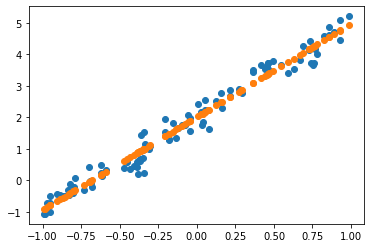

In [202]:
# Here's what we have

plt.scatter(x[:,0],y) # Original dataset
plt.scatter(x[:,0],x@a.detach()); # Learned line

"""
SIDENOTE
x@a.detach() we need to detach so we can use it as numpy
This happens because a is an nn.Parameter, which has required_grad = True
Before you can use it somewhere else, you must detach().
"""

## Animation

Copy pasted code from lesson 2 notebook of fastai course.

In [203]:
from matplotlib import animation, rc
rc('animation', html='jshtml') #jshtml for colab

In [204]:
a = nn.Parameter(tensor(-1.,1)) # arbitrary starting point

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach()) # .detach detaches from the current graph
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=100)

TypeError: ignored

This is "batch" gradient descent because it calculates the loss from the whole dataset at once and then get the gradients from there..

Normally, we don't do that. We use **Mini-batch Gradient Descent** which calculates the loss on a `mini-batch` and then get the gradient from there.

It's a combination of Batch GD and Stochastic GD (calculates gradient for one row at a time).

# Mini-batch Gradient Descent

The tweak is straightforward, you feed your data in the neural network in mini-batches, making sure that you randomly sample data without replacement to achieve an epoch (one pass of seeing ALL data points)

`In sampling without replacement, each sample unit of the population has only one chance to be selected in the sample.`

In [205]:
def gradient_descent(bs, epochs):
    '''
        updates vector 'a' using mini-batches to calculate gradients
        bs (int) -> batch size
        epochs (int)
    '''
    losses = [] # for tracking losses
    for epoch in range(epochs):
        mini_batches = []
        batch_idx = []

        '''randomize data by shuffling data once and then slice sequentially'''
        rand_idx = torch.randperm(x.shape[0])
        shuffled_data = x[rand_idx]
        for k in range(0, x.shape[0], bs):
            mini_batches.append(shuffled_data[k:k+bs])
            batch_idx.append(rand_idx[k:k+bs])

        '''update gradients by mini-batches'''
        for i in range(len(mini_batches)):
            y_hat = mini_batches[i]@a
            y_batch = y[batch_idx[i]]
            loss = mse(y_hat, y_batch) # y_hat -> predictions, y -> actual value
            losses.append(loss) # track loss

            if i % 10 == 0: 
                print(loss) # just prints stuff, DOESN'T AFFECT THE ALGO
                

            loss.backward() # computes gradient of current tensor wrt to graph leaves (need to dig into this)
            with torch.no_grad():
                a.sub_(lr * a.grad) # subtracts learning rate * gradient to the parameters (inplace)
                a.grad.zero_() # reset grad to zero because torch accumulates grad.. you don't want to reuse it

    plt.plot(list(range(0,len(losses))), losses)

tensor(8.0760, grad_fn=<MeanBackward0>)
tensor(2.9205, grad_fn=<MeanBackward0>)
tensor(2.2731, grad_fn=<MeanBackward0>)
tensor(0.9423, grad_fn=<MeanBackward0>)
tensor(0.6698, grad_fn=<MeanBackward0>)
tensor(0.4118, grad_fn=<MeanBackward0>)
tensor(0.2389, grad_fn=<MeanBackward0>)
tensor(0.2298, grad_fn=<MeanBackward0>)
tensor(0.1745, grad_fn=<MeanBackward0>)
tensor(0.1225, grad_fn=<MeanBackward0>)
tensor(0.1145, grad_fn=<MeanBackward0>)
tensor(0.0729, grad_fn=<MeanBackward0>)
tensor(0.0784, grad_fn=<MeanBackward0>)
tensor(0.0957, grad_fn=<MeanBackward0>)
tensor(0.0781, grad_fn=<MeanBackward0>)
CPU times: user 38.4 ms, sys: 1.01 ms, total: 39.4 ms
Wall time: 38.5 ms


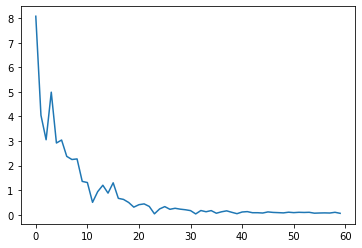

In [206]:
# Achieved optimal solution in 15 epochs BUT updated data 15 * 4 times.
# Noisy din ang loss niya

lr = 1e-1
a = nn.Parameter(tensor(-1.,1));
%time gradient_descent(bs=32, epochs=15)

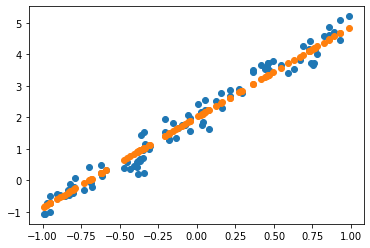

In [207]:
plt.scatter(x[:,0],y) # Original dataset
plt.scatter(x[:,0],x@a.detach()); # Learned line

tensor(5.8109, grad_fn=<MeanBackward0>)
tensor(1.4620, grad_fn=<MeanBackward0>)
tensor(0.4333, grad_fn=<MeanBackward0>)
tensor(0.1705, grad_fn=<MeanBackward0>)
tensor(0.1031, grad_fn=<MeanBackward0>)
tensor(0.0859, grad_fn=<MeanBackward0>)
CPU times: user 29.8 ms, sys: 1.12 ms, total: 30.9 ms
Wall time: 34 ms


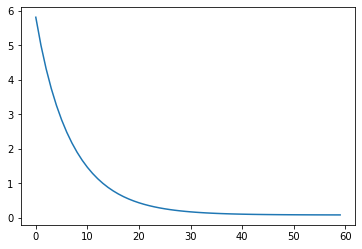

In [208]:
# Demo Batch GD (60 weight updates using whole dataset) for comparison 
# Smoother loss
lr = 1e-1
a = nn.Parameter(tensor(-1.,1));
%time update(60)

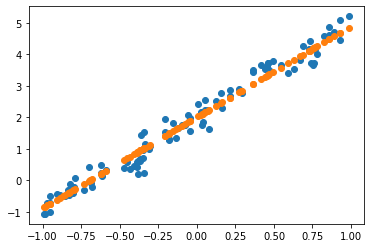

In [209]:
plt.scatter(x[:,0],y) # Original dataset
plt.scatter(x[:,0],x@a.detach()); # Learned line

In [210]:
# Demo of random shuffling
w = tensor([3,2],[4,5], [0,9])
w_rnd_idx = torch.randperm(w.shape[0])
w[w_rnd_idx]

tensor([[4, 5],
        [0, 9],
        [3, 2]])

In [211]:
# demo of how splitting is done
test_bs = 32
for z in range(0, 100, test_bs):
    print(z+test_bs)

# It doesn't matter if lagpas yung max index mo sa actual length
w[0:5]

32
64
96
128


tensor([[3, 2],
        [4, 5],
        [0, 9]])